In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Pattern 1: Reads files from a given folder, no need to change path because the name is changed. Also Reads xlsb ( Binary Files)

Dump the file in any folder. In this case it is desktop and the folder name is myfolder

Function: It reads the excel or xlsb sheet from the folder and put in the dataframe df. 

## Cautions
1. Only one file should be there in your folder. 
2. File should excel file, extension xlsx


In [ ]:
# To change, 4, 5, 15, 18: header, 
import os
# Get the list of all files and folders
pathparent = r"C:\\<your_path\desktop"
folder_source = "myfolder"
path = os.path.join(pathparent,folder_source)

dir_list=os.listdir(path)

source_file = dir_list[0]

file_name,file_extension = os.path.splitext(source_file)
fullpath = os.path.join(path,source_file)

cols=['A','B']

if file_extension == 'xlsb':
    df=pd.read_excel(fullpath,sheet_name='Purchase_sheet',header=5,engine='pyxlsb',usecols=cols,na_values['#DIV/0!','#NAME?','#NUM!','#REF!','#VALUE!'])

if file_extension == 'xlsx':
    df=pd.read_excel(fullpath,sheet_name='Purchase_sheet',header=5,usecols=cols,na_values['#DIV/0!','#NAME?','#NUM!','#REF!','#VALUE!'])
print(fullpath)

## Pattern  2: You have two sheets. You want to know if the values in first sheet are taken  from the values in second sheet. For example, we have a data validation sheet called validation in excel. And we have a main sheet df, where these values are taken from dropdown from validation. You want to know if this is the case

### Creating Dataset

In [1]:
'''
To test this chunk of code, we need two dataframes: df (the main sheet) 
and validation (the validation sheet). The code is mapping columns from 
df to those in validation using the dictionary dic1. It then checks if 
all the values in each column of df are present in the corresponding 
column of validation and prints the result. If any values are not present, 
it also prints those specific values.
we create two dataframes. 
'''
import pandas as pd

# Sample data for dataframe 'df'
df_data = {
    'Crft Code': ['A1', 'A2', 'A3', 'A4'],
    'Brand': ['Nike', 'Adidas', 'Puma', 'Reebok'],
    'Fiber': ['Cotton', 'Polyester', 'Silk', 'Wool'],
    'Colour': ['Red', 'Green', 'Blue', 'Yellow'],
    'Wash Care Instruction': ['Hand Wash', 'Machine Wash', 'Dry Clean', 'Machine Wash'],
    'Vendor': ['Vendor1', 'Vendor2', 'Vendor3', 'Vendor4'],
    'Vendor Code': ['V01', 'V02', 'V03', 'V04'],
    'Type': ['T1', 'T2', 'T3', 'T4']
}

df = pd.DataFrame(df_data)

# Sample data for dataframe 'validation'
# Intentionally not including some values from 'df' to test the code.
validation_data = {
    'CODE': ['A1', 'A2', 'A5', 'A6'],
    'BRAND': ['Nike', 'Adidas', 'Reebok', 'Under Armour'],
    'Fiber': ['Cotton', 'Polyester', 'Silk', 'Nylon'],
    'Colour': ['Red', 'Green', 'Purple', 'Orange'],
    'Wash Care Instruction': ['Hand Wash', 'Machine Wash', 'Machine Wash', 'Dry Clean'],
    'Company Name': ['Vendor1', 'Vendor2', 'Vendor5', 'Vendor6'],
    'Vendor Code': ['V01', 'V02', 'V05', 'V06'],
    'Type': ['T1', 'T2', 'T5', 'T6']
}

validation = pd.DataFrame(validation_data)

df, validation



(  Crft Code   Brand      Fiber  Colour Wash Care Instruction   Vendor  \
 0        A1    Nike     Cotton     Red             Hand Wash  Vendor1   
 1        A2  Adidas  Polyester   Green          Machine Wash  Vendor2   
 2        A3    Puma       Silk    Blue             Dry Clean  Vendor3   
 3        A4  Reebok       Wool  Yellow          Machine Wash  Vendor4   
 
   Vendor Code Type  
 0         V01   T1  
 1         V02   T2  
 2         V03   T3  
 3         V04   T4  ,
   CODE         BRAND      Fiber  Colour Wash Care Instruction Company Name  \
 0   A1          Nike     Cotton     Red             Hand Wash      Vendor1   
 1   A2        Adidas  Polyester   Green          Machine Wash      Vendor2   
 2   A5        Reebok       Silk  Purple          Machine Wash      Vendor5   
 3   A6  Under Armour      Nylon  Orange             Dry Clean      Vendor6   
 
   Vendor Code Type  
 0         V01   T1  
 1         V02   T2  
 2         V05   T5  
 3         V06   T6  )

### Testing Dataset

In [4]:
# Mapping dictionary as provided in the code snippet
dic1 = {
    'Crft Code':'CODE',
    'Brand':'BRAND',
    'Fiber':'Fiber',
    'Colour':'Colour',
    'Wash Care Instruction':'Wash Care Instruction',
    'Vendor':'Company Name',
    'Vendor Code':'Vendor Code',
    'Type':'Type'
}

# Capturing the print outputs
output = []

# Running the provided code
for a in dic1:
    output.append((a, all(df[a].isin(validation[dic1[a]]))))

output.append("==============================")
output.append("Values which are False")
output.append("==============================")

for b in dic1:
    if all(df[b].isin(validation[dic1[b]])) == False:
        mismatched_values = df[b][~df[b].isin(validation[dic1[b]])].tolist()
        output.append(('Column:', b, mismatched_values))

output


[('Crft Code', False),
 ('Brand', False),
 ('Fiber', False),
 ('Colour', False),
 ('Wash Care Instruction', True),
 ('Vendor', False),
 ('Vendor Code', False),
 ('Type', False),
 '==============================',
 'Values which are False',
 '==============================',
 ('Column:', 'Crft Code', ['A3', 'A4']),
 ('Column:', 'Brand', ['Puma']),
 ('Column:', 'Fiber', ['Wool']),
 ('Column:', 'Colour', ['Blue', 'Yellow']),
 ('Column:', 'Vendor', ['Vendor3', 'Vendor4']),
 ('Column:', 'Vendor Code', ['V03', 'V04']),
 ('Column:', 'Type', ['T3', 'T4'])]

## Pattern 3: Here we can use the expected Regex pattern in columns to the actual values and point out if the pattern is not as per expected

### Testing of the Code

In [10]:
import pandas as pd

# Recreating the sample DataFrame with some inconsistent data
sample_data = {
    'Craft Code': ['ABC', 'DEF', 'GHIJ', 'XYZ'],
    'Vendor Style Code': ['123AB001', '234CD002', '345EF003', '456GH0045'],
    'Style Code/CLUSTER': ['ABC123AB001', 'DEF234CD002', 'GHI345GH004', 'JKL456IJ005'],
    'Colour': ['BLUE', 'RED9', 'GREEN', 'YELLOW'],
    'HSN code': ['51234567', '52345678', '5345678', '54567890'],
    'Brick': ['Saree', 'Dupatta', 'Tunic', 'Saree'],
    'Sub Category': ['Silk', 'Cotton2', 'Linen', 'Wool'],
    'Brand': ['PALHA', 'RIMAYA', 'ANUKTA1', 'PAHUNI'],
    'Fiber': ['Polyester', 'Cotton', 'Linen3', 'Silk'],
    'Fabric': ['Georgette', 'Chiffon4', 'Crepe', 'Satin']
}

df_mock = pd.DataFrame(sample_data)

# Dictionary of column names and their regex patterns
regex_patterns = {
    'Craft Code': r'^[A-Z]{3}$',
    'Vendor Style Code': r'^[1-9][0-9]{2}[A-Z]{2}[0-9]{3}$',
    'Style Code/CLUSTER': r'^[A-Z]{3}[1-9][0-9]{2}[A-Z]{2}[0-9]{2}[1-9]$',
    'Colour': r'^[A-Z]+$',
    'HSN code': r'^5[0-9]{7}$',
    'Brick': r'^(Saree|Dupatta)$',
    'Sub Category': r'^[a-zA-Z]+$',
    'Brand': r'^(PALHA|PAHUNI|RIMAYA|ANUKTA)$',
    'Fiber': r'^[a-zA-Z]+$',
    'Fabric': r'^[a-zA-Z]+$'
}
# Dictionary to provide layman descriptions for the regex patterns
layman_descriptions = {
    'Craft Code': 'Three Capital letters',
    'Vendor Style Code': '3 digits (not starting with 0), followed by 2 capital letters, followed by 3 digits',
    'Style Code/CLUSTER': 'Three Capital letters, followed by 3 digits (not starting with 0), followed by 2 capital letters, followed by 3 digits (last digit not 0)',
    'Colour': 'All capital letters',
    'HSN code': '8 digits starting with the number 5',
    'Brick': 'Either "Saree" or "Dupatta"',
    'Sub Category': 'Text only',
    'Brand': 'Either "PALHA", "PAHUNI", "RIMAYA", or "ANUKTA"',
    'Fiber': 'Text only',
    'Fabric': 'Text only'
}

# Modify the code to provide layman descriptions for the issues
inconsistent_data_layman = {}

for col, pattern in regex_patterns.items():
    mismatches = df_mock[col][df_mock[col].astype(str).str.match(pattern) == False]
    if not mismatches.empty:
        inconsistent_data_layman[col] = {
            "Data": mismatches,
            "Expected": layman_descriptions[col]
        }

inconsistent_data_layman

{'Craft Code': {'Data': 2    GHIJ
  Name: Craft Code, dtype: object,
  'Expected': 'Three Capital letters'},
 'Vendor Style Code': {'Data': 3    456GH0045
  Name: Vendor Style Code, dtype: object,
  'Expected': '3 digits (not starting with 0), followed by 2 capital letters, followed by 3 digits'},
 'Colour': {'Data': 1    RED9
  Name: Colour, dtype: object,
  'Expected': 'All capital letters'},
 'HSN code': {'Data': 2    5345678
  Name: HSN code, dtype: object,
  'Expected': '8 digits starting with the number 5'},
 'Brick': {'Data': 2    Tunic
  Name: Brick, dtype: object,
  'Expected': 'Either "Saree" or "Dupatta"'},
 'Sub Category': {'Data': 1    Cotton2
  Name: Sub Category, dtype: object,
  'Expected': 'Text only'},
 'Brand': {'Data': 2    ANUKTA1
  Name: Brand, dtype: object,
  'Expected': 'Either "PALHA", "PAHUNI", "RIMAYA", or "ANUKTA"'},
 'Fiber': {'Data': 2    Linen3
  Name: Fiber, dtype: object,
  'Expected': 'Text only'},
 'Fabric': {'Data': 1    Chiffon4
  Name: Fabric, dty

## Pattern 4: Show Box plot
#### Data Description: There is a categorical column 'Brand' and there are five numeric columns, we need to calculate five box plots for the 'brand' in the x axis. Also need to show the datapoints as the yellow dots. We would like that values are formatted as decimals and not in scientific notation

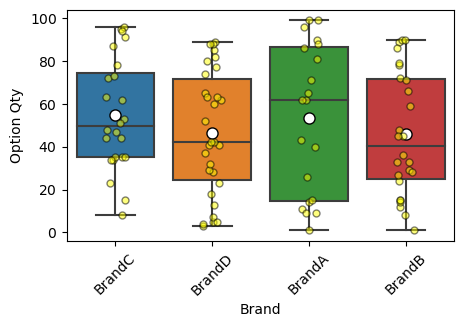

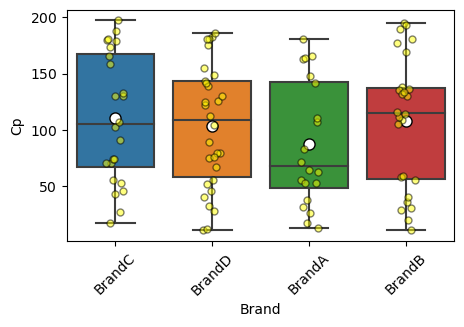

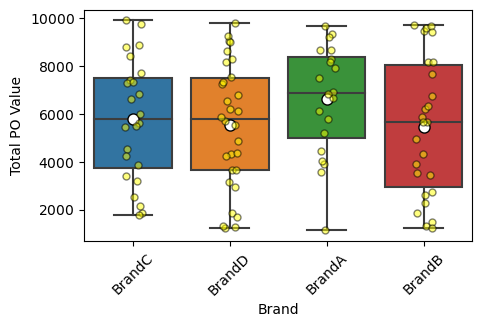

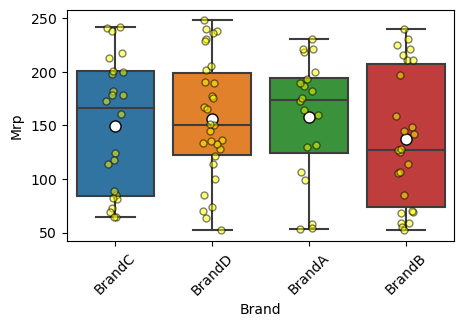

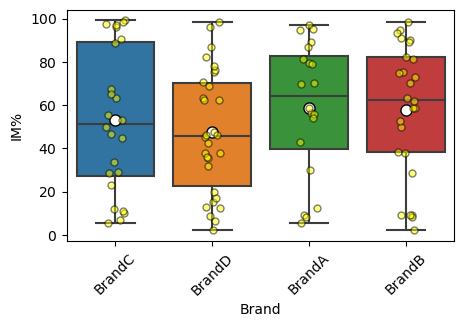

In [16]:
from matplotlib.ticker import ScalarFormatter

# Setting seed for reproducibility
np.random.seed(42)

# Number of data points
n = 100

# Mock data
df = pd.DataFrame({
    'Brand': np.random.choice(['BrandA', 'BrandB', 'BrandC', 'BrandD'], n),
    'Option Qty': np.random.randint(1, 100, n),
    'Cp': np.random.uniform(10, 200, n),
    'Total PO Value': np.random.uniform(1000, 10000, n),
    'Mrp': np.random.uniform(50, 250, n),
    'IM%': np.random.uniform(1, 100, n)
})

a=['Option Qty','Cp','Total PO Value','Mrp','IM%']
for b in a:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Brand',y=b,data=df,showmeans=True,meanprops={'marker':'o',
                                                               'markerfacecolor':'white',
                                                               'markeredgecolor':'black',
                                                               'markersize':'8'})
    sns.stripplot(x='Brand',y=b,data=df,color='yellow',edgecolor='black',linewidth=1,jitter=True,alpha=0.5)
    # Adjust y-axis labels to standard decimal format
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(False)
    formatter.set_useOffset(False)
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.xticks(rotation=45)
    plt.show()

## Pattern 5: Show Scatter Plot with Simple Linear Regression line with Confidence Band

To create a regression line between two numerical columns A and B, Plot different plots for categorical column C with title as the corresponding values of C. make sure that max 2 columns per line are produced. We would like to show the values or r-squared and p-value

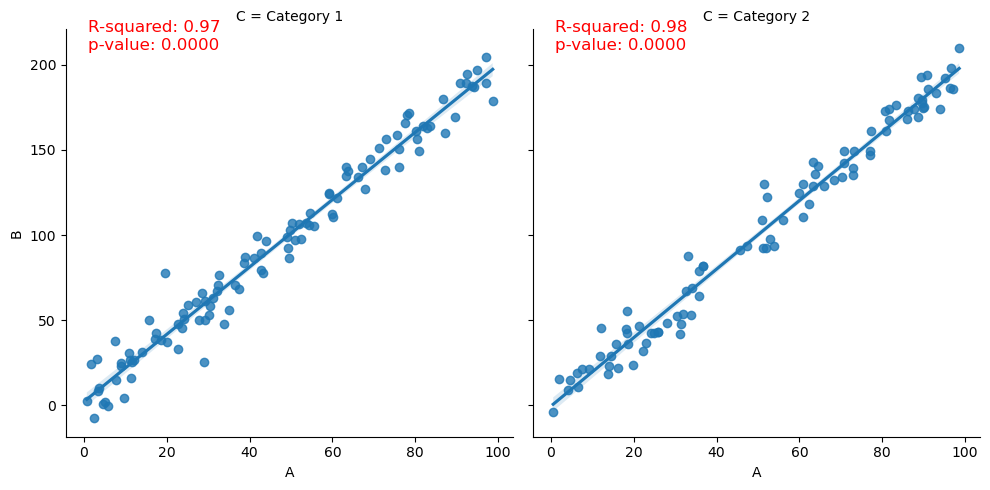

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seed for reproducibility
np.random.seed(42)

# Sample size
n = 200

# Create random data for column A and B
A_values = np.random.rand(n) * 100
B_values = A_values * 2 + np.random.normal(0, 10, n)  # B values have a linear relation with A with some noise

# Create categorical values for column C
C_values = np.random.choice(['Category 1', 'Category 2'], size=n)

# Create the dataframe
df = pd.DataFrame({'A': A_values, 'B': B_values, 'C': C_values})

A='A'
B='B'
C='C'

import matplotlib.pyplot as plt
from scipy.stats import linregress

# Seaborn lmplot
g = sns.lmplot(data=df, x=A, y=B, col=C, col_wrap=2,ci=95)

# Iterate through each subplot to calculate linear regression and annotate
for ax in g.axes.flat:
    C_name = ax.get_title().split('=')[-1].strip()
    C_data = df[df[C] == C_name]
    
    # Calculate linear Regression
    slope, intercept, r_value, p_value, std_err = linregress(C_data[A], C_data[B])
    line = slope * C_data[A] + intercept
    
    # Annotate the plot with R-squared and p-value
    text = f'R-squared: {r_value**2:.2f}\np-value: {p_value:.4f}'
    ax.annotate(text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')

plt.show()


# Pattern 6:  Some Date Patterns

## 6.1 Generate Date Range for Last Week ( Starting from Monday to Sunday)

In [1]:
import pandas as pd
from datetime import timedelta, date

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Check if today is in the current week or the next week
if today.weekday() < 6:  # 0-5 corresponds to Monday to Saturday
    days_since_last_monday = (today.weekday() + 1) % 7  # 1 corresponds to Tuesday (starting day of the week)
    last_monday = today - timedelta(days=days_since_last_monday, weeks=1)
    last_sunday = last_monday + timedelta(days=6)
else:
    # If today is Sunday, adjust to the previous week
    last_monday = today - timedelta(days=6, weeks=1)
    last_sunday = last_monday + timedelta(days=6)

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'].dt.date >= last_monday) & (df['date_column'].dt.date <= last_sunday)]

print("Last Monday:", last_monday)
print("Last Sunday:", last_sunday)
print("Filtered DataFrame:")
print(filtered_df)


Last Monday: 2023-08-06
Last Sunday: 2023-08-12
Filtered DataFrame:
Empty DataFrame
Columns: [date_column]
Index: []


## 6.2 Generate Date Range for Last Month

In [2]:
import pandas as pd
from datetime import date, timedelta

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the first day of the current month
first_day_this_month = today.replace(day=1)

# Calculate the last day of the previous month
last_day_last_month = first_day_this_month - timedelta(days=1)

# Calculate the first day of the previous month
first_day_last_month = last_day_last_month.replace(day=1)

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'].dt.date >= first_day_last_month) & (df['date_column'].dt.date <= last_day_last_month)]

print("First day of last month:", first_day_last_month)
print("Last day of last month:", last_day_last_month)
print("Filtered DataFrame:")
print(filtered_df)


First day of last month: 2023-07-01
Last day of last month: 2023-07-31
Filtered DataFrame:
Empty DataFrame
Columns: [date_column]
Index: []


## 6.3 Generate Date Range for Last Quarter

In [3]:
import pandas as pd
from datetime import date, timedelta

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the last day of the previous quarter
last_quarter_end = pd.Timestamp(today.year, ((today.month - 1) // 3) * 3 + 1, 1) - pd.DateOffset(days=1)

# Calculate the first day of the previous quarter
last_quarter_start = last_quarter_end - pd.DateOffset(months=2)

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'] >= last_quarter_start) & (df['date_column'] <= last_quarter_end)]

print("First day of last quarter:", last_quarter_start)
print("Last day of last quarter:", last_quarter_end)
print("Filtered DataFrame:")
print(filtered_df)


First day of last quarter: 2023-04-30 00:00:00
Last day of last quarter: 2023-06-30 00:00:00
Filtered DataFrame:
Empty DataFrame
Columns: [date_column]
Index: []


## 6.4 Generate Date Range for Current Week Till today

In [4]:
import pandas as pd
from datetime import date, timedelta, datetime

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the first day of the current week (Monday)
first_day_of_week = today - timedelta(days=today.weekday())

# Convert date objects to datetime objects for comparison
first_day_of_week_dt = datetime.combine(first_day_of_week, datetime.min.time())
today_dt = datetime.combine(today, datetime.min.time())

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'] >= first_day_of_week_dt) & (df['date_column'] <= today_dt)]

print("First day of current week:", first_day_of_week_dt)
print("Today:", today_dt)
print("Filtered DataFrame:")
print(filtered_df)


First day of current week: 2023-08-14 00:00:00
Today: 2023-08-16 00:00:00
Filtered DataFrame:
  date_column
0  2023-08-15
1  2023-08-16


## 6.5 Generate Date Range for Current Month Till today

In [3]:
import pandas as pd
from datetime import date, timedelta

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the first day of the current month
first_day_of_month = today.replace(day=1)

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'].dt.date >= first_day_of_month) & (df['date_column'].dt.date <= today)]

print("First day of current month:", first_day_of_month)
print("Today:", today)
print("Filtered DataFrame:")
print(filtered_df)


First day of current month: 2023-09-01
Today: 2023-09-25
Filtered DataFrame:
Empty DataFrame
Columns: [date_column]
Index: []


## 6.6 Generate Date Range for Current Quarter Till today

In [2]:
import pandas as pd
from datetime import date, timedelta, datetime

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Get today's date
today = date.today()

# Calculate the first day of the current quarter
first_day_of_quarter = pd.Timestamp(today.year, ((today.month - 1) // 3) * 3 + 1, 1)

# Convert date objects to datetime objects for comparison
first_day_of_quarter_dt = datetime.combine(first_day_of_quarter.date(), datetime.min.time())
today_dt = datetime.combine(today, datetime.min.time())

# Filter the DataFrame for the date range
filtered_df = df[(df['date_column'] >= first_day_of_quarter_dt) & (df['date_column'] <= today_dt)]

print("First day of current quarter:", first_day_of_quarter_dt)
print("Today:", today_dt)
print("Filtered DataFrame:")
print(filtered_df)


First day of current quarter: 2023-07-01 00:00:00
Today: 2023-09-25 00:00:00
Filtered DataFrame:
  date_column
0  2023-08-15
1  2023-08-16
2  2023-08-17
3  2023-08-18
4  2023-08-19
5  2023-08-20
6  2023-08-21


## 6.7 Generate Date Range for Current Year Till today

In [9]:
import pandas as pd
from datetime import date, timedelta, datetime

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])

# Convert today's date object to datetime object for comparison
today_dt = datetime.combine(today, datetime.min.time())

# Calculate the first and last day of the last year
first_day_of_year_dt = pd.Timestamp(today.year, 1, 1)

# Filter the DataFrame for the date range of the current year till today
filtered_df_year = df[(df['date_column'] >= first_day_of_year_dt) & (df['date_column'] <= today_dt)]

print("First day of current year:", first_day_of_year_dt)
print("Today:", today_dt)
print("Filtered DataFrame for current year till today:")
print(filtered_df_year)

First day of current year: 2023-01-01 00:00:00
Today: 2023-09-25 00:00:00
Filtered DataFrame for current year till today:
  date_column
0  2023-08-15
1  2023-08-16
2  2023-08-17
3  2023-08-18
4  2023-08-19
5  2023-08-20
6  2023-08-21


### 6.8 Generate Date Range for Last Year


In [5]:
import pandas as pd
from datetime import date, timedelta, datetime
# Re-define today's date
today = date.today()

# Sample data with a date column
data = {'date_column': ['2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21']}
df = pd.DataFrame(data)
df['date_column'] = pd.to_datetime(df['date_column'])
# Calculate the first and last day of the last year
first_day_of_last_year = pd.Timestamp(today.year - 1, 1, 1)
last_day_of_last_year = pd.Timestamp(today.year - 1, 12, 31)

# Convert date objects to datetime objects for comparison
first_day_of_last_year_dt = datetime.combine(first_day_of_last_year.date(), datetime.min.time())
last_day_of_last_year_dt = datetime.combine(last_day_of_last_year.date(), datetime.min.time())

first_day_of_last_year_dt, last_day_of_last_year_dt
# Filter the DataFrame for the date range of the last year
filtered_df_last_year = df[(df['date_column'] >= first_day_of_last_year_dt) & (df['date_column'] <= last_day_of_last_year_dt)]

filtered_df_last_year

,date_column


# Pattern 7: Daily, Weekly, Monthly, Yearly Sales Graph. 

Suppose I have a daily sales data of a store which has many brands say A, B, C in a column called 'Brand'etc. I want to know the sales pattern of a brand A Daily, Weekly, Monthly Yearly etc. from a start date. I want to show the data values after every n terms. The dates are stored in a column called "Date" & sales data is stored in "Sales".I want to aggregate the sales values by sum. Can plot a line chart or a bar chart. 

You can extend the logic by providing an end date condition in line 39

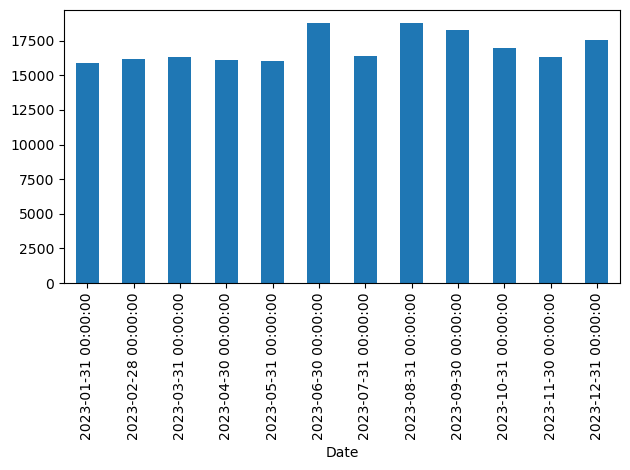

In [17]:
import pandas as pd
import numpy as np

# Generate random sales data for a year
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
sales_data = np.random.randint(100, 1000, size=(len(date_rng), 2))

# Create a dataframe for two brands
df_rimaya = pd.DataFrame({
    'Date': date_rng,
    'Brand': 'A',
    'Sales': sales_data[:, 0]
})

df_other_brand = pd.DataFrame({
    'Date': date_rng,
    'Brand': 'B',
    'Sales': sales_data[:, 1]
})

# Concatenate both dataframes
df = pd.concat([df_rimaya, df_other_brand], ignore_index=True)

# Display the first few rows of the dataset
df.head()
# ==============================================================================
# Main Function
#===============================================================================
import matplotlib.pyplot as plt

# Given variables
agg_variable = 'Sales'
plot = 'bar' #can take bar also
frequency = 'M'  # Can be 'D','W','M',Y'
start_date = '2023-01-01'
brand = 'A'

# Filter the dataframe by given date and brand
df_given_date = df[(df['Date'] >= start_date) & (df['Brand'] == brand)]
grouped = df_given_date.groupby(pd.Grouper(key='Date', freq=frequency))[agg_variable].sum()

# Plot the data
if plot == 'line':
    ax = grouped.plot(kind=plot, marker='o', title=f"{brand}---{agg_variable}--{frequency}")
if plot == 'bar':
    ax = grouped.plot(kind=plot)
    


# Annotate each data point with its value
for x, y in list(zip(grouped.index, grouped.values))[::2]:
    ax.annotate(f'{int(round(y))}', (x, y), textcoords='offset points', xytext=(0, 5), ha='center')

# Show the plot
plt.tight_layout()
plt.show()



# Pattern 7: Compare Frequency Distribution by KDE, ECDF Plots and Histogram

Suppose you have a dataset with a column called 'Brand' containing various brands and a numeric column A eg. MRP, you want to compare the frequency distribution of A by brands

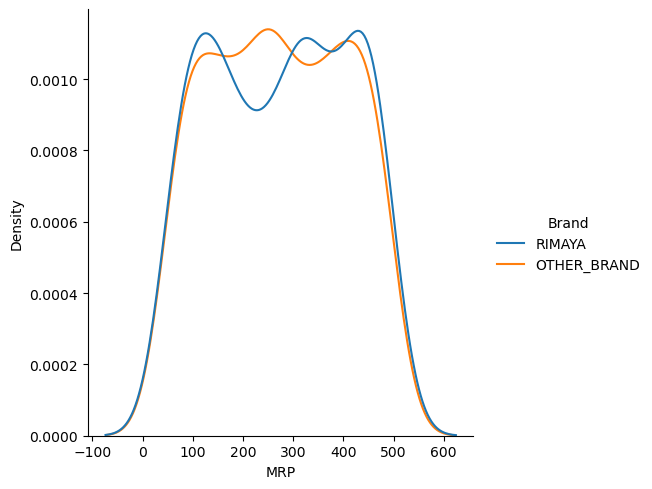

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

# Generate random MRP data
mrp_data = np.random.uniform(50, 500, size=(365,2))

# Create a dataframe for two brands
df_rimaya_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 0],
    'Brand': 'RIMAYA'
})

df_other_brand_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 1],
    'Brand': 'OTHER_BRAND'
})

# Concatenate both dataframes
df = pd.concat([df_rimaya_mrp, df_other_brand_mrp], ignore_index=True)
#=========================================================================
import matplotlib.pyplot as plt
A = 'MRP'
g = sns.displot(data=df,x=A,kind='kde',hue='Brand')
plt.show()

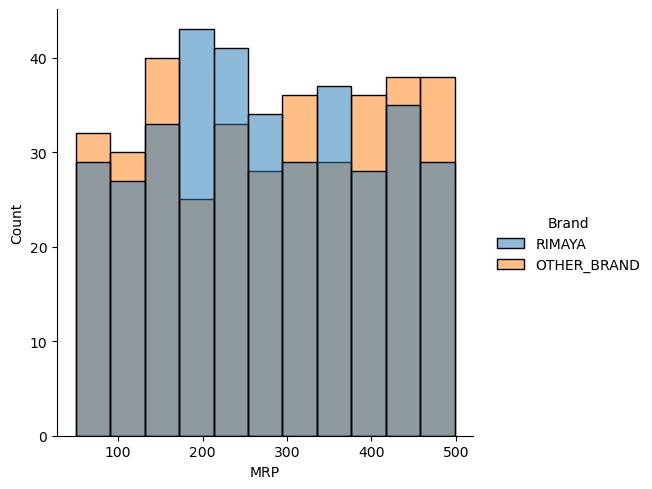

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns

# Generate random MRP data
mrp_data = np.random.uniform(50, 500, size=(365,2))

# Create a dataframe for two brands
df_rimaya_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 0],
    'Brand': 'RIMAYA'
})

df_other_brand_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 1],
    'Brand': 'OTHER_BRAND'
})

# Concatenate both dataframes
df = pd.concat([df_rimaya_mrp, df_other_brand_mrp], ignore_index=True)
#=========================================================================
import matplotlib.pyplot as plt
A = 'MRP'
g = sns.displot(data=df,x=A,kind='hist',hue='Brand')
plt.show()

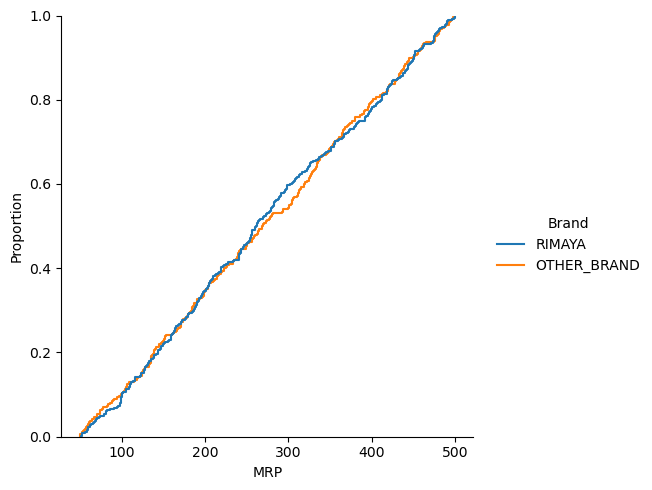

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns

# Generate random MRP data
mrp_data = np.random.uniform(50, 500, size=(365,2))

# Create a dataframe for two brands
df_rimaya_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 0],
    'Brand': 'RIMAYA'
})

df_other_brand_mrp = pd.DataFrame({
    'MRP': mrp_data[:, 1],
    'Brand': 'OTHER_BRAND'
})

# Concatenate both dataframes
df = pd.concat([df_rimaya_mrp, df_other_brand_mrp], ignore_index=True)
#=========================================================================
import matplotlib.pyplot as plt
A = 'MRP'
g = sns.displot(data=df,x=A,kind='ecdf',hue='Brand')
plt.show()